In [117]:
#1
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import tabulate
def sigmoid(score):
    return 1/(1+np.exp(-score))

In [3]:
#2
def binary_cross_entropy_loss(y,y_proba):
    n=y.shape[0]
    return (-1/n)*np.sum(y*(np.log(y_proba))+(1-y)*(np.log(1-y_proba)))    

In [4]:
#3
def binary_cross_entropy_loss_l2(y,y_proba,theta,lambd):
    n=y.shape[0]
    theta_reg=theta.copy()
    theta_reg[0]=0
    return (-1/n)*np.sum(y*(np.log(y_proba))+(1-y)*(np.log(1-y_proba)))+(lambd/2)*np.sum(np.square(theta_reg))

In [5]:
#4
def binary_cross_entropy_loss_l1(y,y_proba,theta,lambd):
    n=y.shape[0]
    theta_reg=theta.copy()
    theta_reg[0]=0
    return (-1/n)*np.sum(y*(np.log(y_proba))+(1-y)*(np.log(1-y_proba)))+(lambd/2)*np.sum(np.abs(theta_reg))

In [6]:
#5
class Logistic_Regression_Binary:
    def __init__(self,learningrate=0.01,epochs=100,tol=0.0001,regularizer="None",
                 lambd=0.0,early_stopping=False,validation_fraction=0.1,
                 plotLearningCurve=True,**kwargs):
        self.learningrate=learningrate
        self.epochs=epochs
        self.tol=tol
        self.regularizer=regularizer
        self.lambd=lambd
        self.early_stopping=early_stopping
        self.validation_fraction=validation_fraction
        self.plotLearningCurve=plotLearningCurve
        
    def fit(self,X,y):
        n,d=X.shape
        theta_hat=np.zeros(d)
        newJ=0
        if self.early_stopping==True:
            X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=self.validation_fraction)
            n_train=X_train.shape[0]
            n_valid=X_valid.shape[0]
            train_loss,valid_loss=[],[]
            theta_hat_train=np.zeros(d)
            newJ_train=0
            newJ_valid=0
            min_valid=float("inf")
            for i in range(self.epochs):
                if self.regularizer=="L1":
                    theta_hat_train_reg=theta_hat_train.copy()
                    theta_hat_train_reg[0]=0
                    y_train_proba=sigmoid(X_train.dot(theta_hat_train))
                    y_valid_proba=sigmoid(X_valid.dot(theta_hat_train))
                    theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_train))+(self.lambd*self.learningrate)*np.sign(theta_hat_train_reg)                
                    previousJ_train=newJ_train
                    previousJ_valid=newJ_valid
                    newJ_train=binary_cross_entropy_loss_l1(y_train,y_train_proba,theta_hat_train,self.lambd)
                    newJ_valid=binary_cross_entropy_loss_l1(y_valid,y_valid_proba,theta_hat_train,self.lambd)
                    train_loss.append(newJ_train)
                    valid_loss.append(newJ_valid)
                    if newJ_valid < min_valid:
                        min_valid=newJ_valid
                        best_epoch=i
                    elif newJ_valid >= min_valid:
                        break
                    if np.abs(newJ_train-previousJ_train)<self.tol:
                        break
                elif self.regularizer=="L2":
                    theta_hat_train_reg=theta_hat_train.copy()
                    theta_hat_train_reg[0]=0
                    y_train_proba=sigmoid(X_train.dot(theta_hat_train))
                    y_valid_proba=sigmoid(X_valid.dot(theta_hat_train))
                    theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_train))+(self.lambd*self.learningrate)*theta_hat_train_reg               
                    previousJ_train=newJ_train
                    previousJ_valid=newJ_valid
                    newJ_train=binary_cross_entropy_loss_l2(y_train,y_train_proba,theta_hat_train,self.lambd)
                    newJ_valid=binary_cross_entropy_loss_l2(y_valid,y_valid_proba,theta_hat_train,self.lambd)
                    train_loss.append(newJ_train)
                    valid_loss.append(newJ_valid)
                    if newJ_valid < min_valid:
                        min_valid=newJ_valid
                        best_epoch=i
                    elif newJ_valid >= min_valid:
                        break
                    if np.abs(newJ_train-previousJ_train)<self.tol:
                        break
                elif self.regularizer=="None":
                    theta_hat_train_reg=theta_hat_train.copy()
                    theta_hat_train_reg[0]=0
                    y_train_proba=sigmoid(X_train.dot(theta_hat_train))
                    y_valid_proba=sigmoid(X_valid.dot(theta_hat_train))
                    theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_train))                
                    previousJ_train=newJ_train
                    previousJ_valid=newJ_valid
                    newJ_train=binary_cross_entropy_loss(y_train,y_train_proba)
                    newJ_valid=binary_cross_entropy_loss(y_valid,y_valid_proba)
                    train_loss.append(newJ_train)
                    valid_loss.append(newJ_valid)
                    if newJ_valid <= min_valid:
                        min_valid=newJ_valid
                        best_epoch=i
                    elif newJ_valid > min_valid:
                        break
                    if abs(newJ_train-previousJ_train) < self.tol:
                        break
            self.theta=theta_hat_train
            if self.plotLearningCurve==True:
                print("number of iterations used: ", best_epoch)
                print("final weight vector: ", self.theta)
                plt.plot(train_loss,label="training loss")
                plt.plot(valid_loss,label="valid loss")
                plt.legend()
                plt.xlabel("epochs")
                plt.ylabel("loss")
                plt.show()
            print()
        elif self.early_stopping==False:
            for i in range(self.epochs):
                if self.regularizer=="L1":
                    theta_hat_reg=theta_hat.copy()
                    theta_hat_reg[0]=0
                    y_proba=sigmoid(X.dot(theta_hat))
                    theta_hat=theta_hat-(self.learningrate/n)*(X.T.dot(y_proba-y))+(self.lambd*self.learningrate)*np.sign(theta_hat_reg)
                    previousJ=newJ
                    newJ=binary_cross_entropy_loss_l1(y,y_proba,theta_hat,self.lambd)
                    if np.abs(newJ-previousJ)<self.tol:
                        break
                elif self.regularizer=="L2":
                    theta_hat_reg=theta_hat.copy()
                    theta_hat_reg[0]=0
                    y_proba=sigmoid(X.dot(theta_hat))
                    theta_hat=theta_hat-(self.learningrate/n)*(X.T.dot((y_proba)-y))+(self.lambd*self.learningrate)*theta_hat_reg
                    previousJ=newJ
                    newJ=binary_cross_entropy_loss_l2(y,y_proba,theta_hat,self.lambd)
                    if np.abs(newJ-previousJ)<self.tol:
                        break
                elif self.regularizer=="None":
                    y_proba=sigmoid(X.dot(theta_hat))
                    theta_hat=theta_hat-(self.learningrate/n)*(X.T.dot(y_proba-y))
                    previousJ=newJ
                    newJ=binary_cross_entropy_loss(y,y_proba)
                    if np.abs(newJ-previousJ)<self.tol:
                        break
            self.theta=theta_hat

    def predict(self,X):
        score=X.dot(self.theta)
        y_hat=(score >= 0).astype(np.int)
        return y_hat
    
        

In [8]:
#6
iris=load_iris()
X = iris["data"]
y = (iris["target"]==2).astype(np.int)


train_test_split already shuffles the data with shuffle=True on already.

In [9]:
#7 and 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)


In [8]:
#9
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
#10 kfold function
def kFold(folds,X_train,y_train,model,**model_args):
    valid_accuracy=[]
    skfolds=StratifiedKFold(n_splits=folds,random_state=42,shuffle=True)
    for train_index, valid_index in skfolds.split(X_train,y_train):
        X_train_fold=X_train[train_index]
        y_train_fold=y_train[train_index]
        X_valid_fold=X_train[valid_index]
        y_valid_fold=y_train[valid_index]
        
        learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init, early_stopping_init, validation_fraction_init, plotLearningCurve_init, multi_class_init = 0.001, 1000, None,None,0.0,True,0.1,False, "softmax" 
        
        
        for key, value in model_args.items(): 
            
            if key=='learningrate':
                learning_rate_init=value
            if key=='epochs':
                epoch_init=value
            if key=='tol':
                tol_init=value
            if key=="regularizer":
                regularizer_init=value
            if key=="lambd":
                lambd_init=value
            if key=="early_stopping":
                early_stopping_init=value
            if key=="validation_fraction":
                validation_fraction_init=value
            if key=="plotLearningCurve":
                plotLearningCurve_init=value
            if key=="multi_class":
                multi_class_init=value
                
        model.fit(X_train_fold, y_train_fold)
        y_predict=model.predict(X_valid_fold)
        
        accuracy=(y_valid_fold==y_predict).mean()
        valid_accuracy.append(accuracy)
    
    return np.array(valid_accuracy).mean()




        
        
        
    

In [12]:
#10 find best hyperparms
X_train_bias=np.insert(X_train,0,1.0,axis=1)
def mydictionary(lamb, learnrate, regular,tol):
    mydict={'lamb':[],'learningrate':[],'tolerance':[],'regularizer':[],'accuracy':[]}
    mylist=[]
    for l in lamb:
        for t in tol:
            for lr in learnrate:
                for r in regular:
                    logreg=Logistic_Regression_Binary(learningrate=lr,epochs=1000,tol=t,regularizer=r,lambd=l,
                                                      early_stopping=True,validation_fraction=0.1,
                                                     plotLearningCurve=False)
                    validaccuracy =kFold(5,X_train_bias,y_train,logreg)
                    mydict={'lambd':l,'learningrate':lr,'tolerance':t,'regularizer':r,'accuracy':validaccuracy}
                    mydict_copy=mydict.copy()
                    mylist.append(mydict_copy)
    header=mylist[0].keys()
    rows= [x.values() for x in mylist]
    print(tabulate.tabulate(rows,header,tablefmt='grid'))
lamb=[0.1,0.01, 0.001, 0.0001]
learnrate= [0.1, 0.01, 0.001, 0.0001]
regular=["None","L1","L2"]
tol=[0.001,0.0001,0.00001,0.000001,0.0000001]
mydictionary(lamb,learnrate,regular,tol)

we get an accuracy of 0.975 from the hyperparms lambda 0.0001 learning rate of 0.1, tolerance of 1e-06 and regularizer L1

number of iterations used:  11225
final weight vector:  [-4.29339265 -2.75369603 -4.83663204  4.55872769  7.83974557]


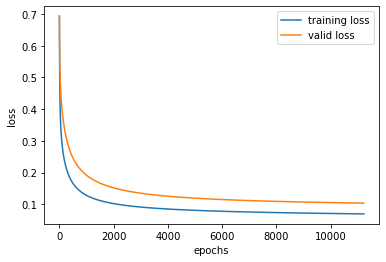


accuracy:  1.0
confusion matrix:  [[22  0]
 [ 0  8]]


In [56]:
#11 and 12
X_test_bias=np.insert(X_test,0,1.0,axis=1)
logreg=Logistic_Regression_Binary(learningrate=0.1,epochs=100000,tol=1e-06,regularizer="L1",lambd=0.0001,
                                                      early_stopping=True,validation_fraction=0.1,
                                                     plotLearningCurve=True)
logreg.fit(X_train_bias,y_train)
y_pred=logreg.predict(X_test_bias)
print("accuracy: ",(y_test==y_pred).mean())
print("confusion matrix: " ,confusion_matrix(y_test,y_pred))

In [63]:
#13
def one_hot_labels(y,class_label):
    y_one_hot = np.zeros((len(y), len(class_label)))
    for i in range(len(y)):
        for j in range(len(class_label)):
            if y[i] == class_label[j]:
                y_one_hot[i][j] = 1
    return y_one_hot


In [64]:
#14
def softmax(score):
    return np.exp(score) / np.sum(np.exp(score), axis=1,keepdims=True)


test=np.array([[1,2,3],[3,4,5]])

softmax(test)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

In [65]:
#15
def cross_entropy_loss(y_one_hot,y_proba):
    n=y_one_hot.shape[0]
    return (-1/n)*np.sum(y_one_hot*np.log(y_proba))

In [66]:
#16
def cross_entropy_loss_l2(y_one_hot,y_proba,theta,lambd):
    n=y_one_hot.shape[0]
    theta_reg=theta.copy()
    theta_reg[0,:]=0
    return (-1/n)*np.sum(y_one_hot*np.log(y_proba))+(lambd/2)*np.sum(np.square(theta_reg))



In [68]:
#17
def cross_entropy_loss_l1(y_one_hot,y_proba,theta,lambd):
    n=y_one_hot.shape[0]
    theta_reg=theta.copy()
    theta_reg[0,:]=0
    return (-1/n)*np.sum(y_one_hot*np.log(y_proba))+(lambd/2)*np.sum(np.abs(theta_reg))

In [58]:
#18
class Logistic_Regression_Multiclass:
    def __init__(self,multi_class="softmax",learningrate=0.01,epochs=100,tol=0.0001,regularizer="None",lambd=0.0,
                 early_stopping=False,validation_fraction=0.1,plotLearningCurve=True,**kwargs):
        self.multi_class=multi_class
        self.learningrate=learningrate
        self.epochs=epochs
        self.tol=tol
        self.regularizer=regularizer
        self.lambd=lambd
        self.early_stopping=early_stopping
        self.validation_fraction=validation_fraction
        self.plotLearningCurve=plotLearningCurve
    
    def fit(self,X,y):
        if self.multi_class=="softmax":
            n,d=X.shape
            newJ=0
            if self.early_stopping==True:
                X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=self.validation_fraction)
                n_train=X_train.shape[0]
                n_valid=X_valid.shape[0]
                class_label=np.unique(y_train)
                y_one_hot_train=one_hot_labels(y_train,class_label)
                y_one_hot_valid=one_hot_labels(y_valid,class_label)
                c_train=y_one_hot_train.shape[1]
                c_valid=y_one_hot_valid.shape[1]
                train_loss,valid_loss=[],[]
                theta_hat_train=np.zeros((d,c_train))
                newJ_train=0
                newJ_valid=0
                min_valid=float("inf")
                for i in range(self.epochs):
                    if self.regularizer=="L1":
                        theta_hat_train_reg=theta_hat_train.copy()
                        theta_hat_train_reg[0,:]=0
                        y_train_proba=softmax(X_train.dot(theta_hat_train))
                        y_valid_proba=softmax(X_valid.dot(theta_hat_train))
                        theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_one_hot_train))+(self.lambd*self.learningrate)*np.sign(theta_hat_train_reg)                
                        previousJ_train=newJ_train
                        previousJ_valid=newJ_valid
                        newJ_train=cross_entropy_loss_l1(y_one_hot_train,y_train_proba,theta_hat_train,self.lambd)
                        newJ_valid=cross_entropy_loss_l1(y_one_hot_valid,y_valid_proba,theta_hat_train,self.lambd)
                        train_loss.append(newJ_train)
                        valid_loss.append(newJ_valid)
                        if newJ_valid < min_valid:
                            min_valid=newJ_valid
                            best_epoch=i
                        elif newJ_valid >= min_valid:
                            break
                        if np.abs(newJ_train-previousJ_train)<self.tol:
                            break
                    elif self.regularizer=="L2":
                        theta_hat_train_reg=theta_hat_train.copy()
                        theta_hat_train_reg[0,:]=0
                        y_train_proba=softmax(X_train.dot(theta_hat_train))
                        y_valid_proba=softmax(X_valid.dot(theta_hat_train))
                        theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_one_hot_train))+(self.lambd*self.learningrate)*theta_hat_train_reg               
                        previousJ_train=newJ_train
                        previousJ_valid=newJ_valid
                        newJ_train=cross_entropy_loss_l2(y_one_hot_train,y_train_proba,theta_hat_train,self.lambd)
                        newJ_valid=cross_entropy_loss_l2(y_one_hot_valid,y_valid_proba,theta_hat_train,self.lambd)
                        train_loss.append(newJ_train)
                        valid_loss.append(newJ_valid)
                        if newJ_valid < min_valid:
                            min_valid=newJ_valid
                            best_epoch=i
                        elif newJ_valid >= min_valid:
                            break
                        if np.abs(newJ_train-previousJ_train)<self.tol:
                            break
                    elif self.regularizer=="None":
                        theta_hat_train_reg=theta_hat_train.copy()
                        theta_hat_train_reg[0,:]=0
                        y_train_proba=softmax(X_train.dot(theta_hat_train))
                        y_valid_proba=softmax(X_valid.dot(theta_hat_train))
                        theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_one_hot_train))                
                        previousJ_train=newJ_train
                        previousJ_valid=newJ_valid
                        newJ_train=cross_entropy_loss(y_one_hot_train,y_train_proba)
                        newJ_valid=cross_entropy_loss(y_one_hot_valid,y_valid_proba)
                        train_loss.append(newJ_train)
                        valid_loss.append(newJ_valid)
                        if newJ_valid <= min_valid:
                            min_valid=newJ_valid
                            best_epoch=i
                        elif newJ_valid > min_valid:
                            break
                        if abs(newJ_train-previousJ_train) < self.tol:
                            break
                self.theta=theta_hat_train
                if self.plotLearningCurve==True:
                    print("number of iterations used: ", best_epoch)
                    print("final weight vector: ", self.theta)
                    plt.plot(train_loss,label="training loss")
                    plt.plot(valid_loss,label="valid loss")
                    plt.legend()
                    plt.xlabel("epochs")
                    plt.ylabel("loss")
                    plt.show()
            
            elif self.early_stopping==False:
                y_one_hot=one_hot_labels(y)
                c=y_one_hot[1]
                theta_hat=np.zeros((d,c))
                for i in range(self.epochs):
                    if self.regularizer=="L1":
                        theta_hat_reg=theta_hat.copy()
                        theta_hat_reg[0,:]=0
                        y_proba=softmax(X.dot(theta_hat))
                        theta_hat=theta_hat-(self.learningrate/n)*(X.T.dot(y_proba-y_one_hot))+(self.lambd*self.learningrate)*np.sign(theta_hat_reg)
                        previousJ=newJ
                        newJ=binary_cross_entropy_loss_l1(y_one_hot,y_proba,theta_hat,self.lambd)
                        if np.abs(newJ-previousJ)<self.tol:
                            break
                    elif self.regularizer=="L2":
                        theta_hat_reg=theta_hat.copy()
                        theta_hat_reg[:,0]=0
                        y_proba=softmax(X.dot(theta_hat))
                        theta_hat=theta_hat-(self.learningrate/n)*(X.T.dot((y_proba)-y_one_hot))+(self.lambd*self.learningrate)*theta_hat_reg
                        previousJ=newJ
                        newJ=cross_entropy_loss_l2(y_one_hot,y_proba,theta_hat,self.lambd)
                        if np.abs(newJ-previousJ)<self.tol:
                            break
                    elif self.regularizer=="None":
                        y_proba=softmax(X.dot(theta_hat))
                        theta_hat=theta_hat-(self.learningrate/n)*(X.T.dot(y_proba-y_one_hot))
                        previousJ=newJ
                        newJ=cross_entropy_loss(y_one_hot,y_proba)
                        if np.abs(newJ-previousJ)<self.tol:
                            break
                self.theta=theta_hat
        elif self.multi_class=="ova":
            self.theta=[]
            for i in np.unique(y):
                y_bin=(y==i).astype(np.int)
                n,d=X.shape
                theta_hat=np.zeros(d)
                newJ=0
                if self.early_stopping==True:
                    X_train, X_valid, y_train, y_valid = train_test_split(X, y_bin, test_size=self.validation_fraction)
                    n_train=X_train.shape[0]
                    n_valid=X_valid.shape[0]
                    train_loss,valid_loss=[],[]
                    theta_hat_train=np.zeros(d)
                    newJ_train=0
                    newJ_valid=0
                    min_valid=float("inf")
                    for i in range(self.epochs):
                        if self.regularizer=="L1":
                            theta_hat_train_reg=theta_hat_train.copy()
                            theta_hat_train_reg[0]=0
                            y_train_proba=sigmoid(X_train.dot(theta_hat_train))
                            y_valid_proba=sigmoid(X_valid.dot(theta_hat_train))
                            theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_train))+(self.lambd*self.learningrate)*np.sign(theta_hat_train_reg)                
                            previousJ_train=newJ_train
                            previousJ_valid=newJ_valid
                            newJ_train=binary_cross_entropy_loss_l1(y_train,y_train_proba,theta_hat_train,self.lambd)
                            newJ_valid=binary_cross_entropy_loss_l1(y_valid,y_valid_proba,theta_hat_train,self.lambd)
                            train_loss.append(newJ_train)
                            valid_loss.append(newJ_valid)
                            if newJ_valid < min_valid:
                                min_valid=newJ_valid
                                best_epoch=i
                            elif newJ_valid >= min_valid:
                                break
                            if np.abs(newJ_train-previousJ_train)<self.tol:
                                break
                        elif self.regularizer=="L2":
                            theta_hat_train_reg=theta_hat_train.copy()
                            theta_hat_train_reg[0]=0
                            y_train_proba=sigmoid(X_train.dot(theta_hat_train))
                            y_valid_proba=sigmoid(X_valid.dot(theta_hat_train))
                            theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_train))+(self.lambd*self.learningrate)*theta_hat_train_reg               
                            previousJ_train=newJ_train
                            previousJ_valid=newJ_valid
                            newJ_train=binary_cross_entropy_loss_l2(y_train,y_train_proba,theta_hat_train,self.lambd)
                            newJ_valid=binary_cross_entropy_loss_l2(y_valid,y_valid_proba,theta_hat_train,self.lambd)
                            train_loss.append(newJ_train)
                            valid_loss.append(newJ_valid)
                            if newJ_valid < min_valid:
                                min_valid=newJ_valid
                                best_epoch=i
                            elif newJ_valid >= min_valid:
                                break
                            if np.abs(newJ_train-previousJ_train)<self.tol:
                                break
                        elif self.regularizer=="None":
                            theta_hat_train_reg=theta_hat_train.copy()
                            theta_hat_train_reg[0]=0
                            y_train_proba=sigmoid(X_train.dot(theta_hat_train))
                            y_valid_proba=sigmoid(X_valid.dot(theta_hat_train))
                            theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_train.T.dot(y_train_proba-y_train))                
                            previousJ_train=newJ_train
                            previousJ_valid=newJ_valid
                            newJ_train=binary_cross_entropy_loss(y_train,y_train_proba)
                            newJ_valid=binary_cross_entropy_loss(y_valid,y_valid_proba)
                            train_loss.append(newJ_train)
                            valid_loss.append(newJ_valid)
                            if newJ_valid <= min_valid:
                                min_valid=newJ_valid
                                best_epoch=i
                            elif newJ_valid > min_valid:
                                break
                            if abs(newJ_train-previousJ_train) < self.tol:
                                break
                    self.theta.append(theta_hat_train)
                    if self.plotLearningCurve==True:
                        print("number of iterations used: ", best_epoch)
                        print("final weight vector: ", self.theta)
                        plt.plot(train_loss,label="training loss")
                        plt.plot(valid_loss,label="valid loss")
                        plt.legend()
                        plt.xlabel("epochs")
                        plt.ylabel("loss")
                        plt.show()
            
        
    def predict(self,X):
        if self.multi_class=="softmax":
            score=X.dot(self.theta)
            y_predict=np.argmax(score,axis=1)
            return y_predict
        elif self.multi_class=="ova":
            y=[]
            for i in self.theta:
                y.append(sigmoid(X.dot(i)))
            y_array=np.stack(y,axis=1)
            y_predict=np.argmax(y_array,axis=1)
            return y_predict
            
                

In [59]:
#19
iris=load_iris()
X = iris["data"]
y = iris["target"]

In [60]:
#20 and 21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [61]:
#22
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
#23 find best hyperparms
X_train_bias=np.insert(X_train,0,1.0,axis=1)
def mydictionary(lamb, learnrate, regular,tol):
    mydict={'lamb':[],'learningrate':[],'tolerance':[],'regularizer':[],'accuracy':[]}
    mylist=[]
    for l in lamb:
        for t in tol:
            for lr in learnrate:
                for r in regular:
                    logreg=Logistic_Regression_Multiclass(learningrate=lr,epochs=500,tol=t,regularizer=r,lambd=l,
                                                      early_stopping=True,validation_fraction=0.1,
                                                     plotLearningCurve=False)
                    validaccuracy =kFold(5,X_train_bias,y_train,logreg)
                    mydict={'lambd':l,'learningrate':lr,'tolerance':t,'regularizer':r,'accuracy':validaccuracy}
                    mydict_copy=mydict.copy()
                    mylist.append(mydict_copy)
    header=mylist[0].keys()
    rows= [x.values() for x in mylist]
    print(tabulate.tabulate(rows,header,tablefmt='grid'))
lamb=[0.1,0.01, 0.001, 0.0001]
learnrate= [0.1, 0.01, 0.001, 0.0001]
regular=["None","L1","L2"]
tol=[0.001,0.0001,0.00001,0.000001,0.0000001]
mydictionary(lamb,learnrate,regular,tol)

+---------+----------------+-------------+---------------+------------+
|   lambd |   learningrate |   tolerance | regularizer   |   accuracy |
+=========+================+=============+===============+============+
|  0.1    |         0.1    |      0.001  | None          |   0.9      |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.1    |      0.001  | L1            |   0.85     |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.1    |      0.001  | L2            |   0.875    |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.01   |      0.001  | None          |   0.841667 |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.01   |      0.001  | L1            |   0.825    |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.01   |      0.001  | L2            |   0.8

with Lambda 0.0001 learningrate 0.1 tolerance 1e-06 and L2 for the regularizer we get an accuracy of 0.95833 and this is the best hyperparms

number of iterations used:  8919
final weight vector:  [[-0.65595764  4.54902215 -3.89306451]
 [-1.99021968  1.41105204  0.57916763]
 [ 2.94951302 -0.75774199 -2.19177103]
 [-3.88342952 -1.47766208  5.3610916 ]
 [-3.70567363 -1.87829749  5.58397112]]


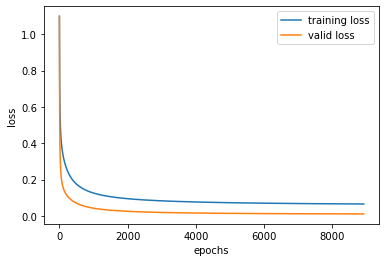

accuracy:  1.0
confusion matrix:  [[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]


In [76]:
#24 and 25
X_test_bias=np.insert(X_test,0,1.0,axis=1)
logreg=Logistic_Regression_Multiclass(multi_class="softmax",learningrate=0.1,epochs=100000,tol=1e-06,regularizer="L2",lambd=0.0001,
                                                      early_stopping=True,validation_fraction=0.1,
                                                     plotLearningCurve=True)
logreg.fit(X_train_bias,y_train)
y_pred=logreg.predict(X_test_bias)
print("accuracy: ",(y_test==y_pred).mean())
print("confusion matrix: " ,confusion_matrix(y_test,y_pred))

number of iterations used:  3140
final weight vector:  [array([-3.06804793, -0.98643376,  2.65651052, -2.44314751, -2.23229477])]


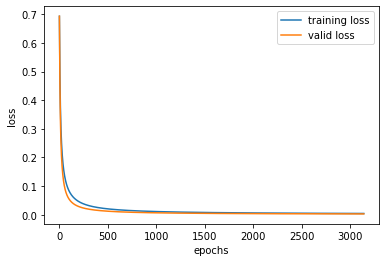

number of iterations used:  2697
final weight vector:  [array([-3.06804793, -0.98643376,  2.65651052, -2.44314751, -2.23229477]), array([-0.84976954,  0.10849156, -1.46348271,  1.18198828, -1.51465171])]


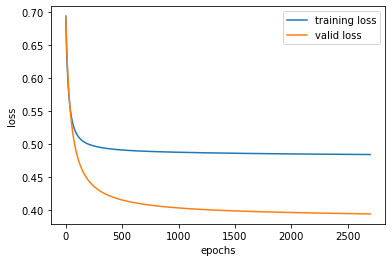

number of iterations used:  7196
final weight vector:  [array([-3.06804793, -0.98643376,  2.65651052, -2.44314751, -2.23229477]), array([-0.84976954,  0.10849156, -1.46348271,  1.18198828, -1.51465171]), array([-6.93458145, -0.08405828, -1.13965074,  5.19014693,  6.31306562])]


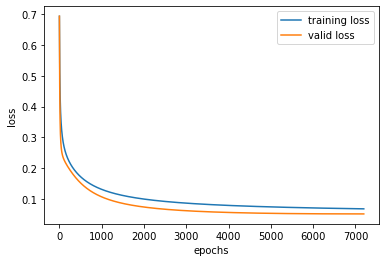

accuracy:  0.9333333333333333
confusion matrix:  [[13  1  0]
 [ 0  7  1]
 [ 0  0  8]]


In [90]:
#26
X_test_bias=np.insert(X_test,0,1.0,axis=1)
logreg=Logistic_Regression_Multiclass(multi_class="ova",learningrate=0.1,epochs=100000,tol=1e-06,regularizer="L2",lambd=0.0001,
                                                      early_stopping=True,validation_fraction=0.1,
                                                     plotLearningCurve=True)
logreg.fit(X_train_bias,y_train)
y_pred=logreg.predict(X_test_bias)
print("accuracy: ",(y_test==y_pred).mean())
print("confusion matrix: " ,confusion_matrix(y_test,y_pred))

In [126]:
#27
def learningschedule(t):
    t0=5
    t1=50
    return t0/(t+t1)

class SGD_Logistic:
    def __init__(self,learningrate=0.01,epochs=100,tol=0.0001,regularizer="None",lambd=0.0,
                 early_stopping=False,validation_fraction=0.1,plotLearningCurve=True,**kwargs):
        self.learningrate=learningrate
        self.epochs=epochs
        self.tol=tol
        self.regularizer=regularizer
        self.lambd=lambd
        self.early_stopping=early_stopping
        self.validation_fraction=validation_fraction
        self.plotLearningCurve=plotLearningCurve
    
    def fit(self,X,y):
        n,d=X.shape
        newJ=0
        best_epoch=0
        if self.early_stopping==True:
            X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=self.validation_fraction)
            n_train=X_train.shape[0]
            n_valid=X_valid.shape[0]
            class_label=np.unique(y_train)
            y_one_hot_train=one_hot_labels(y_train,class_label)
            y_one_hot_valid=one_hot_labels(y_valid,class_label)
            c_train=y_one_hot_train.shape[1]
            c_valid=y_one_hot_valid.shape[1]
            train_loss,valid_loss=[],[]
            theta_hat_train=np.zeros((d,c_train))
            newJ_train=0
            newJ_valid=0
            min_valid=float("inf")
            for i in range(self.epochs):
                if self.regularizer=="L1":
                    random_index=np.random.randint(n_train)
                    X_traini=X_train[random_index:random_index+1]
                    y_one_hot_traini=y_one_hot_train[random_index:random_index+1]
                    theta_hat_train_reg=theta_hat_train.copy()
                    theta_hat_train_reg[0,:]=0
                    y_train_proba=softmax(X_train.dot(theta_hat_train))
                    y_valid_proba=softmax(X_valid.dot(theta_hat_train))
                    y_train_probai=softmax(X_traini.dot(theta_hat_train))
                    self.learningrate=learningschedule(i*n_train+n_train)
                    theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_traini.T.dot(y_train_probai-y_one_hot_traini))+(self.lambd*self.learningrate)*np.sign(theta_hat_train_reg)    
                    previousJ_train=newJ_train
                    previousJ_valid=newJ_valid
                    newJ_train=cross_entropy_loss_l1(y_one_hot_train,y_train_proba,theta_hat_train,self.lambd)
                    newJ_valid=cross_entropy_loss_l1(y_one_hot_valid,y_valid_proba,theta_hat_train,self.lambd)
                    train_loss.append(newJ_train)
                    valid_loss.append(newJ_valid)
                    if i > 10:
                        if valid_loss[i]<valid_loss[i-10]:
                            best_epoch=i
                        elif valid_loss[i]>=valid_loss[i-10]:
                            break
                    if np.abs(newJ_train-previousJ_train)<self.tol:
                        break
                        
                elif self.regularizer=="L2":
                    random_index=np.random.randint(n_train)
                    X_traini=X_train[random_index:random_index+1]
                    y_one_hot_traini=y_one_hot_train[random_index:random_index+1]
                    y_one_hot_validi=y_one_hot_valid[random_index:random_index+1]
                    theta_hat_train_reg=theta_hat_train.copy()
                    theta_hat_train_reg[0,:]=0
                    y_train_proba=softmax(X_train.dot(theta_hat_train))
                    y_train_probai=softmax(X_traini.dot(theta_hat_train))
                    y_valid_proba=softmax(X_valid.dot(theta_hat_train))
                    self.learningrate=learningschedule(i*n_train+n_train)
                    theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_traini.T.dot(y_train_probai-y_one_hot_traini))+(self.lambd*self.learningrate)*theta_hat_train_reg
                    previousJ_train=newJ_train
                    previousJ_valid=newJ_valid
                    newJ_train=cross_entropy_loss_l2(y_one_hot_train,y_train_proba,theta_hat_train,self.lambd)
                    newJ_valid=cross_entropy_loss_l2(y_one_hot_valid,y_valid_proba,theta_hat_train,self.lambd)
                    train_loss.append(newJ_train)
                    valid_loss.append(newJ_valid)
                    if i>10:
                        if valid_loss[i]<valid_loss[i-10]:
                            best_epoch=i
                        elif valid_loss[i]>=valid_loss[i-10]:
                            break
                    if np.abs(newJ_train-previousJ_train)<self.tol:
                        break
                elif self.regularizer=="None":
                    random_index=np.random.randint(n_train)
                    X_traini=X_train[random_index:random_index+1]
                    y_one_hot_traini=y_one_hot_train[random_index:random_index+1]
                    theta_hat_train_reg=theta_hat_train.copy()
                    theta_hat_train_reg[0,:]=0
                    y_train_probai=softmax(X_traini.dot(theta_hat_train))
                    y_train_proba=softmax(X_train.dot(theta_hat_train))
                    y_valid_proba=softmax(X_valid.dot(theta_hat_train))
                    self.learningrate=learningschedule(i*n_train+n_train)
                    theta_hat_train=theta_hat_train-(self.learningrate/n_train)*(X_traini.T.dot(y_train_probai-y_one_hot_traini))
                        
                    previousJ_train=newJ_train
                    previousJ_valid=newJ_valid
                    newJ_train=cross_entropy_loss(y_one_hot_train,y_train_proba)
                    newJ_valid=cross_entropy_loss(y_one_hot_valid,y_valid_proba)
                    train_loss.append(newJ_train)
                    valid_loss.append(newJ_valid)
                    if i>10:
                        if valid_loss[i]<valid_loss[i-10]:
                            best_epoch=i
                        elif valid_loss[i]>=valid_loss[i-10]:
                            break
                    if abs(newJ_train-previousJ_train) < self.tol:
                        break
            self.theta=theta_hat_train
            if self.plotLearningCurve==True:
                print("number of iterations used: ", best_epoch)
                print("final weight vector: ", self.theta)
                plt.plot(train_loss,label="training loss")
                plt.plot(valid_loss,label="valid loss")
                plt.legend()
                plt.xlabel("epochs")
                plt.ylabel("loss")
                plt.show()
            
        elif self.early_stopping==False:
            y_one_hot=one_hot_labels(y)
            c=y_one_hot[1]
            theta_hat=np.random.randn(d,c)
            for i in range(self.epochs):
                if self.regularizer=="L1":
                    random_index=random.randint(n)
                    Xi=X[random_index]
                    y_one_hoti=y_one_hot[random_index]
                    theta_hat_reg=theta_hat.copy()
                    theta_hat_reg[0,:]=0
                    y_proba=softmax(X.dot(theta_hat))
                    y_probai=softmax(Xi.dot(theta_hat))
                    self.learningrate=learningschedule(i*n+n)
                    theta_hat=theta_hat-(self.learningrate/n)*(Xi.T.dot(y_proba-y_one_hoti))+(self.lambd*self.learningrate)*np.sign(theta_hat_reg)    
                    previousJ=newJ
                    newJ=binary_cross_entropy_loss_l1(y_one_hot,y_proba,theta_hat,self.lambd)
                    if np.abs(newJ-previousJ)<self.tol:
                        break
                elif self.regularizer=="L2":
                    random_index=random.randint(n)
                    Xi=X[random_index]
                    y_one_hoti=y_one_hot[random_index]
                    theta_hat_reg=theta_hat.copy()
                    theta_hat_reg[:,0]=0
                    y_proba=sigmoid(X.dot(theta_hat))
                    y_probai=sigmoid(Xi.dot(theta_hat))
                    self.learningrate=learningschedule(i*n+1)
                    theta_hat=theta_hat-(self.learningrate/n)*(Xi.T.dot((y_proba)-y_one_hoti))+(self.lambd*self.learningrate)*theta_hat_reg                        
                    previousJ=newJ
                    newJ=cross_entropy_loss_l2(y_one_hot,y_proba,theta_hat,self.lambd)
                    if newJ>previousJ-tol:
                        break
                elif self.regularizer=="None":
                    random_index=random.randint(n)
                    Xi=X[random_index]
                    y_one_hoti=y_one_hot[random_index]
                    y_proba=softmax(X.dot(theta_hat))
                    y_probai=softmax(Xi.dot(theta_hat))
                    self.learningrate=learningschedule(i*n+1)
                    theta_hat=theta_hat-(self.learningrate/n)*(X.T.dot(y_proba-y_one_hoti))
                    previousJ=newJ
                    newJ=cross_entropy_loss(y_one_hot,y_proba)
                    if np.abs(newJ-previousJ)<self.tol:
                        break
            self.theta=theta_hat
        
                
            
        
    def predict(self,X):
        score=X.dot(self.theta)
        y_predict=np.argmax(score,axis=1)
        return y_predict
        

In [33]:
X_train_bias=np.insert(X_train,0,1.0,axis=1)
def mydictionary(lamb, learnrate, regular,tol):
    mydict={'lamb':[],'learningrate':[],'tolerance':[],'regularizer':[],'accuracy':[]}
    mylist=[]
    for l in lamb:
        for t in tol:
            for lr in learnrate:
                for r in regular:
                    logreg=SGD_Logistic(learningrate=lr,epochs=1000,tol=t,regularizer=r,lambd=l,
                                                      early_stopping=True,validation_fraction=0.1,
                                                     plotLearningCurve=False)
                    validaccuracy =kFold(5,X_train_bias,y_train,logreg)
                    mydict={'lambd':l,'learningrate':lr,'tolerance':t,'regularizer':r,'accuracy':validaccuracy}
                    mydict_copy=mydict.copy()
                    mylist.append(mydict_copy)
    header=mylist[0].keys()
    rows= [x.values() for x in mylist]
    print(tabulate.tabulate(rows,header,tablefmt='grid'))
lamb=[0.1,0.01, 0.001, 0.0001]
learnrate= [0.1, 0.01, 0.001, 0.0001]
regular=["None","L1","L2"]
tol=[0.001,0.0001,0.00001,0.000001,0.0000001]
mydictionary(lamb,learnrate,regular,tol)


+---------+----------------+-------------+---------------+------------+
|   lambd |   learningrate |   tolerance | regularizer   |   accuracy |
+=========+================+=============+===============+============+
|  0.1    |         0.1    |      0.001  | None          |   0.6      |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.1    |      0.001  | L1            |   0.683333 |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.1    |      0.001  | L2            |   0.641667 |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.01   |      0.001  | None          |   0.591667 |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.01   |      0.001  | L1            |   0.675    |
+---------+----------------+-------------+---------------+------------+
|  0.1    |         0.01   |      0.001  | L2            |   0.7

Our best hyperparms with an accuracy of 0.8666 is learningrate=0.001 with tol=1e-07 lambda=0.0001 and regularizer L1

number of iterations used:  115
final weight vector:  [[-2.29984655e-04  3.06376574e-06  2.26920890e-04]
 [-7.40636918e-04 -2.13034967e-04  9.34796751e-04]
 [ 6.69614492e-04 -4.90876104e-04 -1.93854123e-04]
 [-8.59726629e-04 -5.28085851e-05  8.93660080e-04]
 [-7.95993579e-04 -8.50110150e-05  8.62129460e-04]]


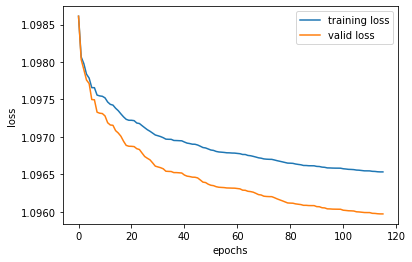

accuracy:  0.8
confusion matrix:  [[14  0  0]
 [ 0  2  6]
 [ 0  0  8]]
   Precision  Recall
0   1.000000    1.00
1   1.000000    0.25
2   0.571429    1.00


In [130]:
#26
import pandas as pd
def precision(c_m):
    tp = np.diagonal(c_m)
    fp = np.sum(c_m,axis=0) - tp
    return tp/(tp + fp)

#Function to compute recall
def recall(c_m):
    tp = np.diagonal(c_m)
    fn = np.sum(c_m,axis=1) - tp
    return tp/(tp + fn)

X_test_bias=np.insert(X_test,0,1.0,axis=1)
logreg=SGD_Logistic(learningrate=0.001,epochs=100000,tol=1e-07,regularizer="L1",lambd=0.0001,
                                                      early_stopping=True,validation_fraction=0.1,
                                                     plotLearningCurve=True)
logreg.fit(X_train_bias,y_train)
y_pred=logreg.predict(X_test_bias)
print("accuracy: ",(y_test==y_pred).mean())
print("confusion matrix: " ,confusion_matrix(y_test,y_pred))
precision_values = precision(confusion_matrix(y_test,y_pred))
recall_values = recall(confusion_matrix(y_test,y_pred))
d1=np.zeros((3,2))
for i in range(3):
    d1[i][0]=precision_values[i]
    d1[i][1]=recall_values[i]
    
df1=pd.DataFrame(d1,columns=['Precision','Recall'])
print(df1)


we get an accuracy of 0.866